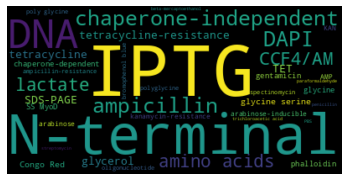

In [4]:
import os
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS

# A dictionary storing frequency of each entity mention.
ent_mention_frequency = defaultdict(int)

data_dir = "huner_mentions"
model = "chemical"

files = os.listdir(data_dir)
if ".DS_Store" in files:
    files.remove(".DS_Store")
    
exclude = ["the", "and", "on", "en", "amino acid"]

for fname in files:
    
    fp = open(os.path.join(data_dir, fname), "r")
    lines = fp.readlines()
    for line in lines:
        line_split = line.strip().split("\t")
        ent_id = line_split[0] # unique ID 
        ent_mention = line_split[2] # entity mention
        
        # entity type, span 
        ent_type, start, end = line_split[1].strip().split(" ")
        if(ent_type == model+"_huner"):     
            if(len(ent_mention)>1 and ent_mention not in exclude):
                ent_mention_frequency[ent_mention] += 1
    fp.close()

stopwords_list = list(STOPWORDS) + ["the", "and"]
wordcloud = WordCloud(stopwords =  stopwords_list).generate_from_frequencies(ent_mention_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()